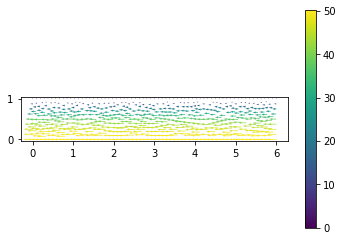

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


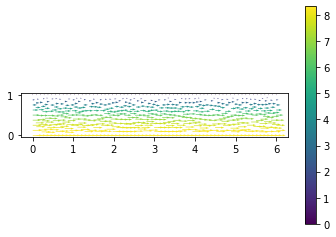

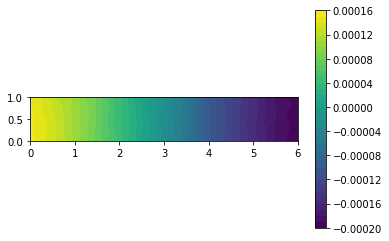

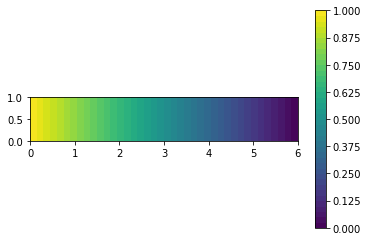

In [21]:
from dolfin import *
import mshr
import sympy as sym
N = 32
L = 6
f = Constant((0.0, 0.0))
domain = mshr.Rectangle(Point(0, 0), Point(L, 1))
mesh = mshr.generate_mesh(domain, N)
mu = 0.01

epsilon = 100


g = Constant((-1.0, 0.0))
# Build function space
P2 = VectorElement("P", mesh.ufl_cell(), 1)
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)

x, y = sym.symbols('x[0], x[1]')  
G = -1/6
p_0 = 1
p_D = G * x + p_0 +y * 0
u_D = -G * (1 - y * y) / (2 * mu) + x * 0


u_D = sym.simplify(u_D)
u_D = Expression((sym.printing.ccode(u_D), 0), degree=5)
p_D = sym.simplify(p_D)
p_D = Expression(sym.printing.ccode(p_D), degree=5)


inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 6)'
walls   = 'near(x[1], 1)'


# Define boundary conditions
bcu_noslip  = DirichletBC(W.sub(0), Constant((0, 0)), walls)
#bcp_inflow  =BC(W.sub(1), Constant(100), inflow)
#bcp_outflow = DirichletBC(W.sub(1), Constant(0), outflow)

bcs = [bcu_noslip]
# The bilinear and linear forms corresponding to the weak mixed
# formulation of the Stokes equations are defined as follows: ::

# Define variational problem
(u, p) = TrialFunctions(W)
(v, q) = TestFunctions(W)

a = (mu*inner(grad(u), grad(v)) + div(v)*p + mu*q*div(u) + epsilon/N/N/mu*inner(grad(q), grad(p)))*dx
L = inner(f, v)*dx + inner(g,v)*dx 

U = Function(W)
solve(a == L, U, bcs)

# Get sub-functions
u, p = U.split()

# Save solution in VTK format
ufile_pvd = File("velocity.pvd")
ufile_pvd << u
pfile_pvd = File("pressure.pvd")
pfile_pvd << p


import matplotlib.pyplot as plt
c = plot(u)
plt.colorbar(c)
plt.show()


u_D = project(u_D, VectorFunctionSpace(mesh, "P", 4))
c2 = plot(u_D)
plt.colorbar(c2)
plt.show()

d = plot(p)
plt.colorbar(d)
plt.show()

p_D = project(p_D, FunctionSpace(mesh, "P", 4))
d2 = plot(p_D)
plt.colorbar(d2)
plt.show()

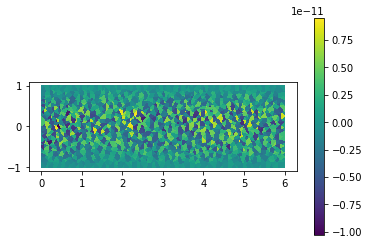